# Task 1:Prediction using Supervised ML 

## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing libraries 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns  
%matplotlib inline

In [18]:
# Importing data
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.shape

Data imported successfully


(25, 2)

In [19]:
data.head(8)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


## **Exploratory Data Analysis**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


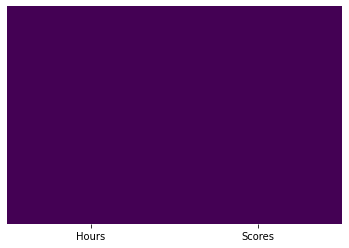

In [5]:
## Check for null values

sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**There is no null value is present**


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data.

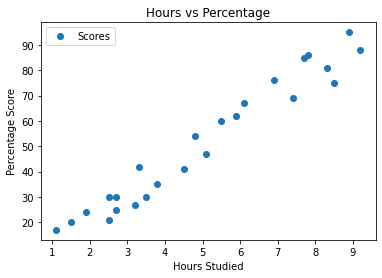

In [6]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above,
 we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

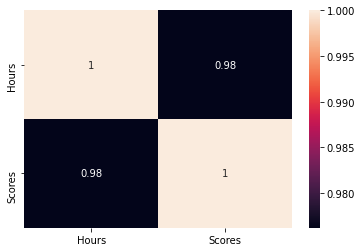

In [20]:
sns.heatmap(data.corr(),annot=True)

**We can say that our independent feature is highly dependent on dependent feature.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [7]:
X = data.iloc[:, :-1].values  ## independent features
y = data.iloc[:, 1].values    ## dependent features

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [24]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [26]:
print("X_Train  dimension: {}\ny_Train  dimension: {}\nX_Test  dimension:{}\ny_Test  dimension: {}".format(
X_train.shape,
y_train.shape,
X_test.shape,
y_test.shape,))

X_Train  dimension: (20, 1)
y_Train  dimension: (20,)
X_Test  dimension:(5, 1)
y_Test  dimension: (5,)


### **Training**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [9]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


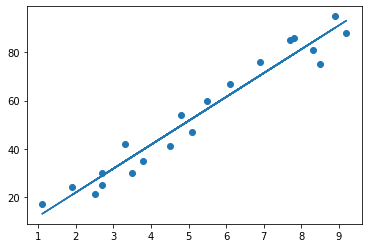

In [27]:
# Plotting the regression line
line = regressor.coef_*X_train+regressor.intercept_

# Plotting for the train data
plt.scatter(X_train, y_train)
plt.plot(X_train, line);
plt.show()

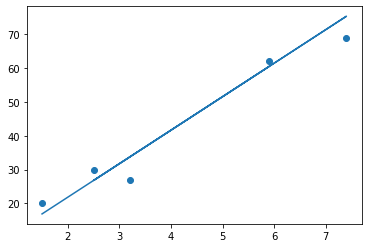

In [28]:
# Plotting the regression line
line = regressor.coef_*X_test+regressor.intercept_
# Plotting for the test data
plt.scatter(X_test, y_test)
plt.plot(X_test, line);
plt.show()

# **Prediction**
Now that we have trained our algorithm, it's time to make some predictions.

In [11]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [30]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).T
df 

,0,1,2,3,4
Actual,20.000000,27.000000,69.000000,30.000000,62.000000
Predicted,16.884145,33.732261,75.357018,26.794801,60.491033


In [17]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[9.25]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

# Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [31]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.9515510725211553
Coefficient of determination R^2 <-- on train set: 0.9454906892105354


In [14]:
from sklearn import metrics  
import math
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', 
      math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


# **Thank You**